In [1]:
from scipy.stats import multivariate_normal as mult_gauss
import numpy as np
import random
from numpy import linalg as LA
import sklearn as sklearn
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib qt

### The Expectation Maximization algorithm for a Gaussian mixture model is implemented as follows:

In [2]:
class EM_Gaussian_Misture(object):
    
    def __init__(self, X_data, K, tol):
        self.X_Data = X_data                       # X_data has dimension in the rows and observations in the coloumns
        self.K = K                                 # Mixture size
        self.d, self.N = self.X_Data.shape              # find the shape of the data
        self.gam = np.zeros((self.N,self.K))            # initialize all gammas as zero
        self.pi = np.random.uniform(0,1,self.K)         # initialize the contributions
        self.mu = np.random.random((self.d,self.K))     # initialize the means
        self.sigma =  np.array([np.eye(self.d)]*self.K) # initialize the covariances
        self.tol = tol
        

    def E_step(self):  # compute the posteriori probabilities
        for i in range(self.N):
            for j in range(self.K):
                self.gam[i,j] = self.pi[j]*mult_gauss(self.mu[:,j], self.sigma[j,:,:]).pdf(self.X_Data[:,i]) # first find the numerator for all n's in N and k's in K
        sumd = self.gam.sum(1)     # to find the denominatior sum over all k's for a n in N
        self.gam = self.gam.T/sumd # find the posterior probabilities  
        return self.gam.T 
    
    def M_step(self):
        self.gam = self.E_step()  # get the gammas 
        N_k = self.gam.sum(0)    # compute Nk by summing all the rows of gamma
        
        self.pi = N_k/self.N     # compute pi
        
        self.mu = np.dot(self.gam.T, self.X_Data.T)
        self.mu = self.mu.T/N_k  # compute mu       
        
        for i in range(self.K):                    # compute sigma
            for j in range(self.N):
                dum = np.reshape((self.X_Data[:,j] -  self.mu[:,i]), (self.d,1)) # compute (X_n-mu_n)
                self.sigma[i,:,:] += self.gam[j,i]*np.dot(dum, dum.T)           # compute (X_n-mu_n)(X_n-mu_n)^T
            self.sigma[i,:,:] = self.sigma[i,:,:]/N_k[i]  # divide sigma of each mixture by N_k to compute sigma
        
        return self.pi, self.gam, self.mu, self.sigma
    
    def EM_Gauss(self):  # to compute log-likelihood and check convergence
        error = 10
        l_old = 0
        iter = 0
        while error>self.tol:
            
            self.pi, self.gam, self.mu, self.sigma = self.M_step()

            l_new = 0.0
            for i in range(self.N):
                dum = 0.0
                for j in range(self.K):
                    dum += self.pi[j]*mult_gauss(self.mu[:,j], self.sigma[j,:,:]).pdf(self.X_Data[:,i])
                dum = np.log(dum)
                l_new += dum

            error = abs(l_new-l_old)
            l_old = l_new        
            print('iter =', iter, ' error = ', error)
            iter += 1
        return np.array(self.pi), np.array(self.mu), np.array(self.sigma)

### Generate data

In [3]:
# def generate_data(mean, cov, pii, N):
def generate_data(generators, N, pi):
#     X_data = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*N))
#                     for pi, mu, sigma in zip(pii, mean, cov)])
    print(pi)
    draw = np.random.choice([0, 1, 2], N, p=pi.tolist())
    unique, counts = np.unique(draw, return_counts=True)
    
    print(dict(zip(unique, counts)))
    
    X_Data = [np.array(generators[i].rvs()) for i in draw]
    X_Data = np.array(X_Data)
    print(X_Data.shape[1])
    if X_Data.shape[1] == 2:
        plt.plot(X_Data[:,0], X_Data[:,1], '.')
        plt.axis('equal')
        plt.show()
        
    elif X_Data.shape[1] == 3:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        # Data for a three-dimensional line
        ax.plot3D(X_Data[:,0], X_Data[:,1], X_Data[:,2], '.')
        
    else:
        print("Can't plot dimension > 3 !!!")

    return X_Data.T

### Estimate the parametrs

[0.3 0.2 0.5]
{0: 313, 1: 206, 2: 481}
2


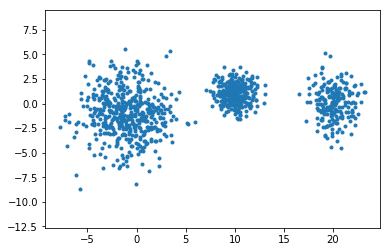

(2, 1000)
iter = 0  error =  5416.174610661366
iter = 1  error =  57.99815989563194
iter = 2  error =  26.086508057594074
iter = 3  error =  10.464039099129877
iter = 4  error =  5.448777248057013
iter = 5  error =  3.754434144520019
iter = 6  error =  3.179010135734643
iter = 7  error =  3.190890640276848
iter = 8  error =  3.429763007992733
iter = 9  error =  3.398666353634326
iter = 10  error =  2.9440989350523523
iter = 11  error =  2.376326016729763
iter = 12  error =  2.0416787506155742
iter = 13  error =  2.0246983321640073
iter = 14  error =  2.3909838496874727
iter = 15  error =  3.354547094099871
iter = 16  error =  5.4654817502614605
iter = 17  error =  10.082978394991187
iter = 18  error =  21.14005830674705
iter = 19  error =  53.184535850280554
iter = 20  error =  105.59932498638591
iter = 21  error =  54.08877382875744
iter = 22  error =  35.743924288094604
iter = 23  error =  53.298131420177015
iter = 24  error =  73.76073148009255
iter = 25  error =  18.861043776870247

In [4]:
## ------ 2D data generation ------------ ##
# mean = np.array([[20,1], [-2,15], [-3, 10]])
# cov = np.array([[[1, 0], [0, 1]], [[2,0],[0,2]], [[3,0],[0,8]] ])
pi = np.array([0.3, 0.2, 0.5])

# mean = np.array([[20,1], [-2,15]])
# cov = np.array([[[1, 0], [0, 1]], [[2,0],[0,2]] ])
# pi = np.array([0.6, 0.8])

generators = [
    mult_gauss([10, 1], [[1, 0], [0, 1]]),             
    mult_gauss([20, 0], [[2, 0], [0, 3]]), 
    mult_gauss([-1, -1], [[5, 0], [0, 5]])]

## ------ 3D data generation ------------ ##
# mean = np.array([[20,10,1], [-22,15,10], [-30, 10,1]])
# cov = np.array([[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[2,0,0],[0,2,0], [0,0,2]], [[3,0,0],[0,3,0],[0,0,3]] ])
# pi = np.array([0.3, 0.2, 0.1])




N = 1000
K = 3
tol = 0.0000001
# Data =  generate_data(mean, cov, pi, N)
Data =  generate_data(generators, N, pi)
# X_data = input("Input X_data:")
print(Data.shape)

X_data = Data

obj = EM_Gaussian_Misture(X_data, K, tol)
pi, mu, sigma = obj.EM_Gauss()

print('pi = \n', pi, '\n')
print('mu = \n', mu, '\n')
print('Sigma = \n', sigma, '\n')

### Visualize

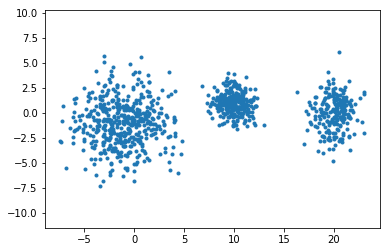

In [5]:
generators = [
    mult_gauss(mu[:,0], sigma[0,:,:]),             
    mult_gauss(mu[:,1], sigma[1,:,:]), 
    mult_gauss(mu[:,2], sigma[2,:,:])]
# print(pi.tolist())
# print(pi.sum())
draw = np.random.choice([0, 1, 2], N, p=pi.tolist())
X_Data_hat = [np.array(generators[i].rvs()) for i in draw]
X_Data_hat = np.array(X_Data_hat)
X_Data_hat = X_Data_hat.T

plt.plot(X_Data_hat[0,:], X_Data_hat[1,:], '.')
plt.axis('equal')
plt.show()


# pis = pi
# mus = mu
# sigmas = sigma
# X_data = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*N))
#                     for pi, mu, sigma in zip(pis, mus, sigmas)])



# print(x.shape)
# print(y.shape)

In [6]:
unique, counts = np.unique(draw, return_counts=True)
dict(zip(unique, counts))

{0: 221, 1: 473, 2: 306}

In [7]:
print('pi = \n', pi, '\n')
print('mu = \n', mu, '\n')
print('Sigma = \n', sigma, '\n')

pi = 
 [0.20600001 0.48104495 0.31295504] 

mu = 
 [[20.04167052 -1.01324032  9.99728748]
 [ 0.05770717 -1.00901346  0.98196569]] 

Sigma = 
 [[[ 1.52385558 -0.0413644 ]
  [-0.0413644   2.82004857]]

 [[ 5.457667   -0.12028729]
  [-0.12028729  5.42620181]]

 [[ 1.09477445 -0.03307767]
  [-0.03307767  0.98917113]]] 



In [8]:
print(np.random.random((3,2,2)))

[[[0.55836977 0.79220105]
  [0.97203332 0.1757101 ]]

 [[0.25811027 0.45791699]
  [0.26802762 0.72401395]]

 [[0.84056084 0.54650307]
  [0.3756374  0.52139455]]]


In [9]:
I = np.array([np.eye(2)] * 3)
print(I[1,:,:])

[[1. 0.]
 [0. 1.]]


#### For generating PSD matrix

In [10]:
A = np.random.rand(1000, 1000)
U, s, V = LA.svd(np.dot(A.T, A))
X = np.dot(np.dot(U, 1.0 + np.diag(np.random.rand(1000))), V)
# print(X)
e,v = LA.eig(X)
# print(e)

In [11]:
print(np.random.uniform(0,1,3))

[0.76340975 0.14031536 0.93608764]


In [12]:
A = np.array([[1,2], [3,4]])
print(A)
sumd = A.sum(1)
print(sumd)
A = (A.T/sumd)
print(A.T)

[[1 2]
 [3 4]]
[3 7]
[[0.33333333 0.66666667]
 [0.42857143 0.57142857]]


In [13]:
print(np.array([[1,2], [3,4]])/np.array([4, 5]))

[[0.25 0.4 ]
 [0.75 0.8 ]]


In [14]:
A = np.array([[1,2,3],[4,5,6],[5,7,2]])
print('A = ', A)

B = np.array([[1,5],[2,4],[4,1]])
print('B = ', B)

A =  [[1 2 3]
 [4 5 6]
 [5 7 2]]
B =  [[1 5]
 [2 4]
 [4 1]]


In [15]:
w = np.dot(A,B)
print(w)

[[17 16]
 [38 46]
 [27 55]]


In [16]:
print( np.array([[1,3,5], [2,4,6]]) - np.array([[1],[5]]) )

[[ 0  2  4]
 [-3 -1  1]]


In [17]:
print(A)

[[1 2 3]
 [4 5 6]
 [5 7 2]]


In [18]:
print(A[1,:,None, None])

[[[4]]

 [[5]]

 [[6]]]


In [19]:
print(np.reshape(A[1,:], (3,1)))

[[4]
 [5]
 [6]]


In [20]:
A = np.random.random((3,2,2))
print(A)

[[[0.97542225 0.86044486]
  [0.61794497 0.92806658]]

 [[0.43614997 0.65392373]
  [0.79142335 0.80671048]]

 [[0.41535884 0.59068857]
  [0.47975155 0.52636553]]]


In [21]:
print(A[0])

[[0.97542225 0.86044486]
 [0.61794497 0.92806658]]


In [22]:
A = np.array([np.eye(3)]*4)
print(A)

[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]


In [23]:
print(A[0])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [24]:
print(abs(-1))

1


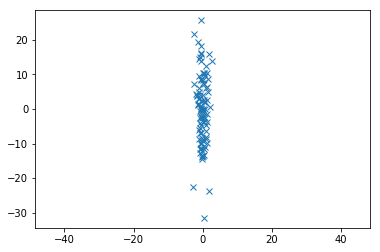

(100,)
(100,)
[[-9.86167033e-01  2.53362264e-02 -3.47182229e-03 -4.95554571e-01
   4.71453253e-01  2.24023019e-01 -1.25753214e+00 -2.41142514e+00
  -4.47495153e-01 -1.32075942e-01 -8.57605585e-01 -5.93939178e-01
  -4.79703692e-01  2.99274338e-01 -5.17232944e-01  7.04351781e-01
   1.50976396e+00  1.35577832e+00 -7.43298885e-01 -2.44608242e+00
  -5.09348286e-01  2.92317633e-01  9.36583004e-01 -4.86594255e-01
   5.40260625e-01  1.21972614e+00 -5.32413397e-01  1.60489215e+00
   1.74246292e-01 -5.87792058e-03  1.14090738e+00 -1.18506749e+00
   3.41120066e-01 -1.85666923e+00 -1.13361149e+00  3.82516288e-02
   9.33922556e-01 -7.40526686e-01 -4.74631039e-01 -1.93408720e-01
  -7.14612457e-01 -3.73518826e-01 -9.73334836e-01 -1.60948491e-01
   1.97777683e-01 -3.58556158e-01 -3.93519319e-01 -1.47508877e+00
   9.57325955e-01 -4.72912199e-01 -4.50332673e-01 -1.94628837e-01
  -1.01897045e+00 -1.41740664e+00 -1.07288477e+00  3.06507239e-02
   2.64991537e-01 -1.01113953e+00 -2.30749419e-01  1.07099355e

In [25]:
mean = [0, 0]
cov = [[1, 0], [0, 100]] 
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
print(x.shape)
print(y.shape)
X_data = np.zeros((2, 100))
X_data[0,:] = np.array(x)
X_data[1,:] = np.array(y)
print(X_data)

In [26]:
n = 10000
_mus = np.array([[0,10], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

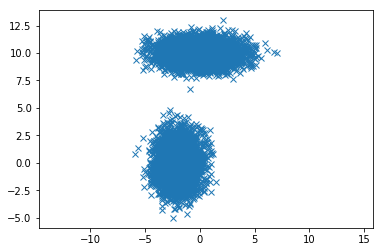

(100,)
(100,)


In [27]:
plt.plot(xs[:,0], xs[:,1], 'x')
plt.axis('equal')
plt.show()
print(x.shape)
print(y.shape)

In [28]:
print(_sigmas)

[[[3.  0. ]
  [0.  0.5]]

 [[1.  0. ]
  [0.  2. ]]]


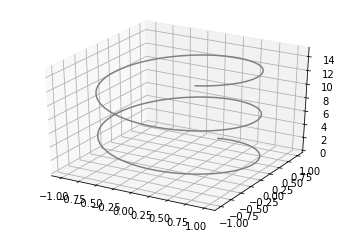

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

In [30]:
mean = np.array([[20,1], [-2,15]])
cov = np.array([[[1, 0], [0, 1]], [[2,0],[0,2]] ])
pi = np.array([0.6, 0.8])

## ------ 3D data generation ------------ ##
# mean = np.array([[20,10,1], [-22,15,10], [-30, 10,1]])
# cov = np.array([[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[2,0,0],[0,2,0], [0,0,2]], [[3,0,0],[0,3,0],[0,0,3]] ])
# pi = np.array([0.3, 0.2, 0.1])

N = 10000
K = 2
tol = 0.0000001
Data =  generate_data(mean, cov, pi, N)

TypeError: generate_data() takes 3 positional arguments but 4 were given

In [ ]:
print(Data.shape)